In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### After importing the useful libraries we read the data

In [50]:
df = pd.read_csv('orders.csv')

In [51]:
df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


### Use only the breakfast users which are the users we want to segment

In [100]:
df=df[df['cuisine']=='Breakfast']

In [101]:
df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,1,3.60
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,1,1.90
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,1,1.70
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,1,3.00
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,1,3.00
...,...,...,...,...,...,...,...
207958,7263840786692,169008847728,2022-01-10 10:07:51 UTC,Ρόδος,Breakfast,0,5.20
207959,7400785395384,204555630573,2022-01-31 14:43:05 UTC,Ρόδος,Breakfast,0,6.65
207960,7375063674700,311089886688,2022-01-27 17:16:07 UTC,Ρόδος,Breakfast,1,4.60
207961,7211036589604,210899698527,2022-01-02 17:59:55 UTC,Λέρος,Breakfast,0,2.00


### Check the data types

In [102]:
df.dtypes

order_id             int64
user_id              int64
order_timestamp     object
city                object
cuisine             object
paid_cash            int32
amount             float64
dtype: object

### Convert the boolean paid cash to int 0 and 1 to help on clustering 

In [103]:
df["paid_cash"] = df["paid_cash"].astype(int)

C:\Users\pcala\AppData\Local\Temp/ipykernel_10856/2495654848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["paid_cash"] = df["paid_cash"].astype(int)


### We make a short analysis on the variables

In [104]:
df.describe()

,order_id,user_id,paid_cash,amount
count,2.079630e+05,2.079630e+05,207963.000000,207963.000000
mean,7.305541e+12,2.959549e+11,0.587032,5.093825
std,5.981107e+10,2.053375e+11,0.492368,3.248764
min,7.202719e+12,1.103620e+08,0.000000,0.400000
25%,7.251892e+12,1.271327e+11,0.000000,3.100000
50%,7.307995e+12,2.450251e+11,1.000000,4.400000
75%,7.362920e+12,4.922339e+11,1.000000,6.000000
max,7.404765e+12,6.855662e+11,1.000000,150.000000


<AxesSubplot:xlabel='amount', ylabel='Count'>

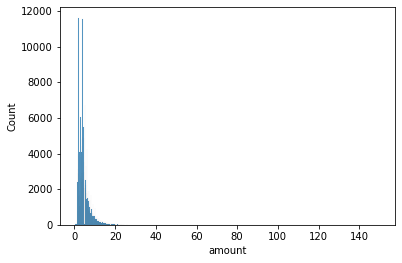

In [105]:
sns.histplot(data=df, x="amount")

<AxesSubplot:xlabel='paid_cash', ylabel='Count'>

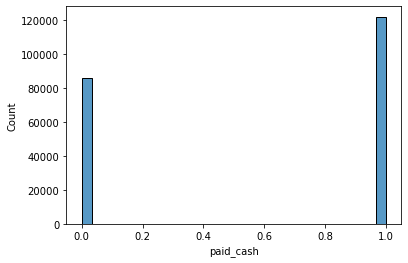

In [106]:
sns.histplot(data=df, x="paid_cash")

### We create the Frequency: How often have they bought breakfast

In [107]:
freq = df.groupby('user_id')['order_timestamp'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['user_id','frequency']

In [108]:
df_freq

,user_id,frequency
0,110361993,1
1,144777339,14
2,145424244,1
3,153963390,1
4,155515962,1
...,...,...
55829,685517465640,1
55830,685519276974,1
55831,685526134167,1
55832,685538295981,1


### merge this dataframe with the previous one

In [109]:
df_=df_freq.merge(df,on='user_id')

In [137]:
df_

,user_id,frequency,order_id,order_timestamp,city,cuisine,paid_cash,amount
0,110361993,1,7249621603152,2022-01-08 11:17:38 UTC,Ρόδος,Breakfast,0,4.3
1,144777339,14,7399018219132,2022-01-31 09:45:38 UTC,Αίγιο,Breakfast,0,3.4
2,144777339,14,7214818797164,2022-01-03 09:45:07 UTC,Αίγιο,Breakfast,0,4.8
3,144777339,14,7320302215060,2022-01-18 10:57:18 UTC,Αίγιο,Breakfast,0,3.4
4,144777339,14,7236022202912,2022-01-06 12:53:50 UTC,Αίγιο,Breakfast,1,4.6
...,...,...,...,...,...,...,...,...
207958,685517465640,1,7402777499808,2022-01-31 20:01:25 UTC,Αγρίνιο,Breakfast,1,2.0
207959,685519276974,1,7402935977888,2022-01-31 20:19:06 UTC,Λαμία,Breakfast,1,5.4
207960,685526134167,1,7402965342944,2022-01-31 20:22:07 UTC,Βέροια,Breakfast,1,6.1
207961,685538295981,1,7403286028000,2022-01-31 20:53:03 UTC,Δράμα,Breakfast,0,7.5


### Total ammount of each user

In [111]:

m = df_.groupby('user_id')['amount'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['user_id','total_amount']

In [112]:
final_df=m.merge(df_,on='user_id')

In [113]:
final_df

,user_id,total_amount,frequency,order_id,order_timestamp,city,cuisine,paid_cash,amount
0,110361993,4.3,1,7249621603152,2022-01-08 11:17:38 UTC,Ρόδος,Breakfast,0,4.3
1,144777339,60.8,14,7399018219132,2022-01-31 09:45:38 UTC,Αίγιο,Breakfast,0,3.4
2,144777339,60.8,14,7214818797164,2022-01-03 09:45:07 UTC,Αίγιο,Breakfast,0,4.8
3,144777339,60.8,14,7320302215060,2022-01-18 10:57:18 UTC,Αίγιο,Breakfast,0,3.4
4,144777339,60.8,14,7236022202912,2022-01-06 12:53:50 UTC,Αίγιο,Breakfast,1,4.6
...,...,...,...,...,...,...,...,...,...
207958,685517465640,2.0,1,7402777499808,2022-01-31 20:01:25 UTC,Αγρίνιο,Breakfast,1,2.0
207959,685519276974,5.4,1,7402935977888,2022-01-31 20:19:06 UTC,Λαμία,Breakfast,1,5.4
207960,685526134167,6.1,1,7402965342944,2022-01-31 20:22:07 UTC,Βέροια,Breakfast,1,6.1
207961,685538295981,7.5,1,7403286028000,2022-01-31 20:53:03 UTC,Δράμα,Breakfast,0,7.5


### Create the final dataset

In [114]:
Data=final_df[['user_id','frequency','total_amount','city','cuisine','paid_cash']]

In [115]:
Data

,user_id,frequency,total_amount,city,cuisine,paid_cash
0,110361993,1,4.3,Ρόδος,Breakfast,0
1,144777339,14,60.8,Αίγιο,Breakfast,0
2,144777339,14,60.8,Αίγιο,Breakfast,0
3,144777339,14,60.8,Αίγιο,Breakfast,0
4,144777339,14,60.8,Αίγιο,Breakfast,1
...,...,...,...,...,...,...
207958,685517465640,1,2.0,Αγρίνιο,Breakfast,1
207959,685519276974,1,5.4,Λαμία,Breakfast,1
207960,685526134167,1,6.1,Βέροια,Breakfast,1
207961,685538295981,1,7.5,Δράμα,Breakfast,0


### Check about Outliers by creating  boxplot. We don't have serious outliers

frequency: 


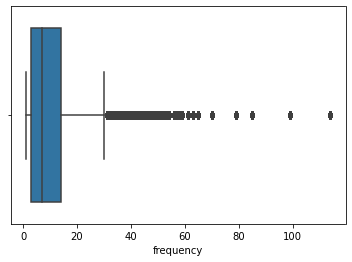

total_amount: 


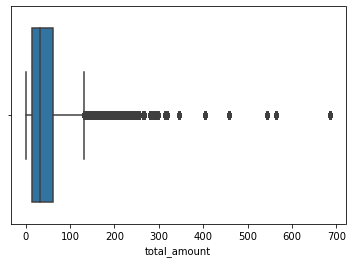

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['frequency','total_amount']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=Data[str(i)])
    plt.show()

### Standardization because we will use euclidean distance

In [117]:
from sklearn.preprocessing import StandardScaler
new_df = Data.drop_duplicates()
col_names = ['frequency','total_amount']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [118]:
scaled_features

,frequency,total_amount
0,-0.613573,-0.684629
1,1.747010,1.516491
2,1.747010,1.516491
3,-0.613573,-0.388549
4,-0.613573,-0.501527
...,...,...
67480,-0.613573,-0.774232
67481,-0.613573,-0.641775
67482,-0.613573,-0.614504
67483,-0.613573,-0.559963


### Building a clustering model, we need to decide how many segments we want to group the data into. This is achieved by a heuristic called the elbow method. We will create a loop and run the K-Means algorithm from 1 to 10 clusters. Then, we can plot model results for this range of values and select the elbow of the curve as the number of clusters to use.

### A K-Means clustering algorithm to perform customer segmentation.The goal of a K-Means clustering model is to segment all the data available into non-overlapping sub-groups that are distinct from each other.

Text(0, 0.5, 'Inertia')

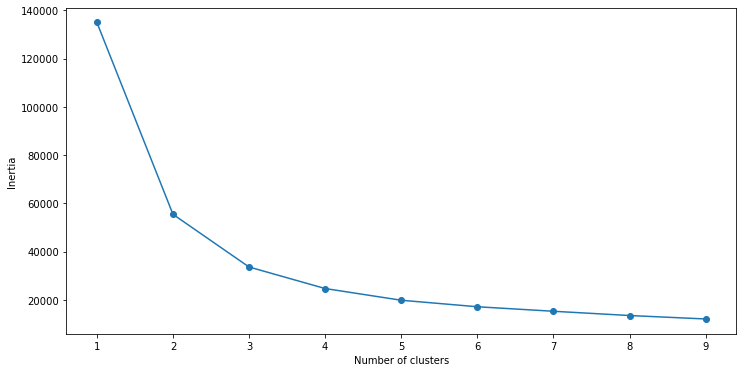

In [119]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

###  Build a model with 4 clusters the best silhoutte score 0.60 (the silhouette score we want to be as close we can to 1) 

In [131]:

kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [132]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.601665713161287


###  Built  segmentation model and assign clusters to each customer in the dataset

In [133]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

###  visualize our data to identify the distinct traits of customers in each segment:

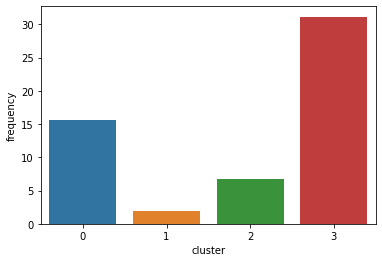

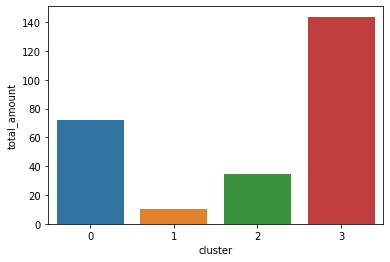

In [134]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [135]:
avg_df

,cluster,user_id,frequency,total_amount,paid_cash
0,0,2.771976e+11,15.582542,72.091556,0.541928
1,1,3.138653e+11,1.865977,9.937940,0.603952
2,2,2.879172e+11,6.733648,34.381350,0.553025
3,3,2.673848e+11,31.151546,143.736062,0.547423
